
# 4.7: Parallelism: Using the Joblib backend

This example demonstrates how to use the Joblib backend for simulating dipoles using `hnn_core`.

`hnn_core` can take advantage of [the Joblib library](https://joblib.readthedocs.io/en/stable/) to run **multiple** independent simulations simultaneously across **multiple** CPU processors. This is an example of ["embarrassingly parallel" processing jobs](https://en.wikipedia.org/wiki/Embarrassingly_parallel). In HNN, this is commonly done if you want to run many "trials" of the same simulation. Since each trial simulation is fully independent of the other trial simulations, each trial simulation can be run on its own CPU core. Joblib parallelism is particularly useful if you are using [batch simulation to explore parameter spaces](https://jonescompneurolab.github.io/textbook/content/04_using_hnn/batch_simulation.html).

Note that to use Joblib parallelism, you need either the `conda` install or the `Joblib Installation` dependencies described [in our Installation Guide here](https://jonescompneurolab.github.io/hnn-core/dev/install.html).

Note that Joblib parallelism is distinct from `hnn_core`'s use of [MPI parallelism, which can be found here](https://jonescompneurolab.github.io/textbook/content/04_using_hnn/parallelism_mpi.html).

In [8]:
# Authors: Mainak Jas <mjas@mgh.harvard.edu>
#          Blake Caldwell <blake_caldwell@brown.edu>
#          Austin Soplata <austin_soplata@brown.edu>

Let us import what we need from `hnn_core`:

In [9]:
import matplotlib.pyplot as plt

from hnn_core import simulate_dipole, jones_2009_model
from hnn_core.viz import plot_dipole

Following our [Alpha example](https://jonescompneurolab.github.io/textbook/content/06_alpha_beta/api.html), we will create our network and add a ~10 Hz "bursty" drive:

In [10]:
net = jones_2009_model()

weights_ampa = {'L2_pyramidal': 5.4e-5, 'L5_pyramidal': 5.4e-5}
net.add_bursty_drive(
    'bursty', tstart=50., burst_rate=10, burst_std=20., numspikes=2,
    spike_isi=10, n_drive_cells=10, location='distal',
    weights_ampa=weights_ampa, event_seed=278)

Finally, we will simulate using the [`JoblibBackend` class](https://jonescompneurolab.github.io/hnn-core/dev/generated/hnn_core.parallel_backends.JoblibBackend.html#hnn_core.parallel_backends.JoblibBackend). You can control the number of CPU cores to use via `n_jobs`, while the number of total trials to be run can be specified by `n_trials`. Note that these numbers do NOT have to match: you can ask for more trials than there are jobs available, and Joblib will simply execute later jobs after the first batch has completed.

In [16]:
from hnn_core import JoblibBackend

with JoblibBackend(n_jobs=4):
    dpls = simulate_dipole(net, tstop=210., n_trials=6)

Joblib will run 6 trial(s) in parallel by distributing trials over 4 jobs.
Building the NEURON model
Building the NEURON model
Loading custom mechanism files from /opt/anaconda3/envs/website-redesign-mpi/lib/python3.12/site-packages/hnn_core/mod/arm64/.libs/libnrnmech.so
Building the NEURON model
Loading custom mechanism files from /opt/anaconda3/envs/website-redesign-mpi/lib/python3.12/site-packages/hnn_core/mod/arm64/.libs/libnrnmech.so
Building the NEURON model
[Done]
Trial 2: 0.03 ms...
[Done]
Trial 4: 0.03 ms...
[Done]
[Done]
Trial 3: 0.03 ms...
Trial 1: 0.03 ms...
Trial 2: 10.0 ms...
Trial 4: 10.0 ms...
Trial 1: 10.0 ms...
Trial 3: 10.0 ms...
Trial 2: 20.0 ms...
Trial 4: 20.0 ms...
Trial 3: 20.0 ms...
Trial 1: 20.0 ms...
Trial 2: 30.0 ms...
Trial 4: 30.0 ms...
Trial 3: 30.0 ms...
Trial 1: 30.0 ms...
Trial 2: 40.0 ms...
Trial 4: 40.0 ms...
Trial 3: 40.0 ms...
Trial 1: 40.0 ms...
Trial 2: 50.0 ms...
Trial 4: 50.0 ms...
Trial 3: 50.0 ms...
Trial 1: 50.0 ms...
Trial 2: 60.0 ms...
Tri

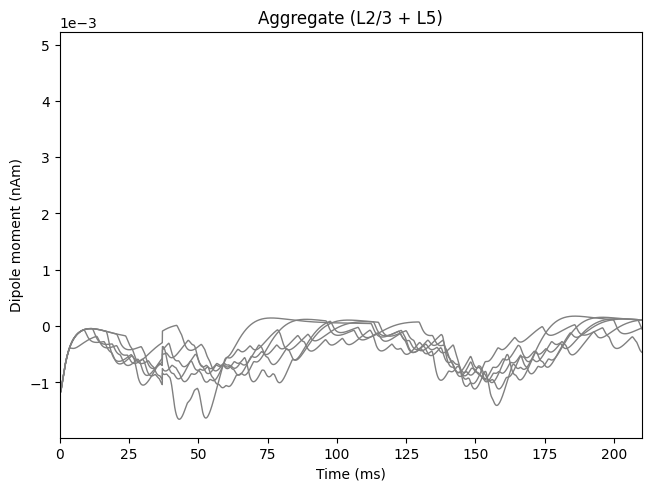

In [17]:
plot_dipole(dpls, show=False)
plt.show()